# **1.Telecom Churn Prediction**

### **Predict churning customers for a Telecom company based on temporal behaviour**
    In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

    For many incumbent operators, retaining high profitable customers is the number one business
    goal. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. In this project, you will analyze customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn.

#### **1.1Data Description**

    **File descriptions:
    train.csv: Contains 172 columns. The primary key that represents each customer is id. The target variable that you need to predict is churn_probability which contains a value of 0 or 1. This data is what you are going to use for EDA, cleaning, feature engineering, model building, model evaluation, model selection, and finally model training.**

    **test.csv: Contains 171 columns, doesn't contain the target variable churn_probability. You will apply all the necessary preprocessing steps to get this data into the right format and then use the model trained using the train.csv file to make predictions with this. This is unseen data! Only the competition hosts know the actual values of the target feature for this data and therefore your submissions will be evaluated on how well your model does with this dataset.**

    **sample.csv: This contains the format in which you need to submit the solutions to Kaggle. The id column in this dataset exactly the same as the id column in test.csv. You will make your predictions on the test.csv data and store them in a submission file that has the same format as this file. Check the Overview>Evaluation tab for mode details.**

    **data_dictionary.csv: This contains the definitions for the various acronyms that you will need to understand each variable. For example, the variable total_og_mou_7, contains the acronyms total, og, mou, and 7, which can be translated as the total outgoing minutes of voice calls made by the user in month of July.**

    **Data Definitions
    The definitions are also listed down below:**

    CIRCLE_ID : Telecom circle area to which the customer belongs to**

    LOC : Local calls - within same telecom circle

    STD : STD calls - outside the calling circle

    IC : Incoming calls

    OG : Outgoing calls

    T2T : Operator T to T, i.e. within same operator (mobile to mobile)

    T2M : Operator T to other operator mobile

    T2O : Operator T to other operator fixed line

    T2F : Operator T to fixed lines of T

    T2C : Operator T to it’s own call center

    ARPU : Average revenue per user

    MOU : Minutes of usage - voice calls

    AON : Age on network - number of days the customer is using the operator T network

    ONNET : All kind of calls within the same operator network

    OFFNET : All kind of calls outside the operator T network

    ROAM : Indicates that customer is in roaming zone during the call

    SPL : Special calls

    ISD : ISD calls

    RECH : Recharge

    NUM : Number

    AMT : Amount in local currency

    MAX : Maximum

    DATA : Mobile internet

    3G : 3G network

    AV : Average

    VOL : Mobile internet usage volume (in MB)

    2G : 2G network

    PCK : Prepaid service schemes called - PACKS

    NIGHT : Scheme to use during specific night hours only

    MONTHLY : Service schemes with validity equivalent to a month

    SACHET : Service schemes with validity smaller than a month

    *.6 : KPI for the month of June

    *.7 : KPI for the month of July

    *.8 : KPI for the month of August

    FB_USER : Service scheme to avail services of Facebook and similar social networking sites

    VBC : Volume based cost - when no specific scheme is not purchased and paid as per usage

    train.csv - the training set

    test.csv - the test set

    sample_submission.csv - a sample submission file in the correct format

    metaData.csv - supplemental information about the data


### **1.2 Goal**

  ***Your job is to predict whether a customer will churn, given ~170 columns containing customer behavior, usage patterns, payment patterns, and other characteristics that might be relevant. Your target variable is "churn_probability".***

### **1.3 Nature of the problem**

   ***We are in a binary classification problem given the nature of the problem.***

### **1.4 Performance measurement**

   ***To measure the performance of my model, in this project I will use classification accuracy as a metric.***
   
### **1.5 Selection of an evaluation protocol**

   ***To evaluate my models, I will use k-fold cross validation.***


## **2.Data preparation**

**The modules I will use in this part are the following:**
    **Pandas, Numpy, Matplotlib, Seaborn, Scikit-learn**

In [1]:
#Import
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

**2.1 Data loading**

In [3]:
#Train dataset
train_df = pd.read_csv("Dataset/train.csv")
#Test dataset
test_df = pd.read_csv("Dataset/test.csv")

**2.2 DESCRIBE AND TRANSFORM COLUMNS**

**2.2.1 Describe the structure of your data**

In [5]:
#Shape
train_df.shape

#The first value represents the number of rows and the last value the number of columns of my training data.

(69999, 172)

In [6]:
#For more information about our training data, we will use the info() method of pandas.
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 172 entries, id to churn_probability
dtypes: float64(135), int64(28), object(9)
memory usage: 91.9+ MB


In [8]:
#To display the structure of my training data, I use the head() method of pandas.
# set the max columns to none
pd.set_option('display.max_columns', None)
train_df.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,NaN,7/8/2014,NaN,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,Na

In [11]:
#Distribution of data by class
#select_dtypes
train_df.iloc[:,-1].value_counts(normalize=True)

0    0.898113
1    0.101887
Name: churn_probability, dtype: float64

## **3.Discover and visualize data to better understand it.**

   **In this part, given the number of columns, I will use principal component analysis to reduce the dimension of the dataset for a better visualization. To do this, I will have to preprocess the data.**

In [12]:
from sklearn.datasets import fetch_openml
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector as selector

In [14]:
x_train = train_df.drop("churn_probability",axis=1)
y_train = train_df.iloc[:,-1]

In [17]:
x_train.shape

(69999, 171)

In [18]:
y_train

0        0
1        0
2        0
3        0
4        0
        ..
69994    0
69995    0
69996    0
69997    0
69998    0
Name: churn_probability, Length: 69999, dtype: int64

In [20]:

# Scale numeric values
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

# One-hot encode categorical values
cat_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [21]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, selector(dtype_include=np.number)),
        ('cat', cat_transformer, selector(dtype_include=object))])

In [28]:
from sklearn.decomposition import PCA
X_scaled = preprocessor.fit_transform(x_train)
#Création d'un objet de type PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
#Afficher le total de variance retenue en gardant k colonnes
pca.explained_variance_ratio_

array([0.11303763, 0.08115444])

In [36]:
principal_Df = pd.DataFrame(data = X_pca
             , columns = ['principal component 1', 'principal component 2'])
principal_Df["churn_probability"]=y_train

In [40]:
principal_Df["churn_probability"].value_counts(normalize=True)

0    0.898113
1    0.101887
Name: churn_probability, dtype: float64

In [42]:
principal_Df.corr()

,principal component 1,principal component 2,churn_probability
principal component 1,1.000000e+00,-2.771175e-17,-0.115611
principal component 2,-2.771175e-17,1.000000e+00,0.011725
churn_probability,-1.156105e-01,1.172487e-02,1.000000


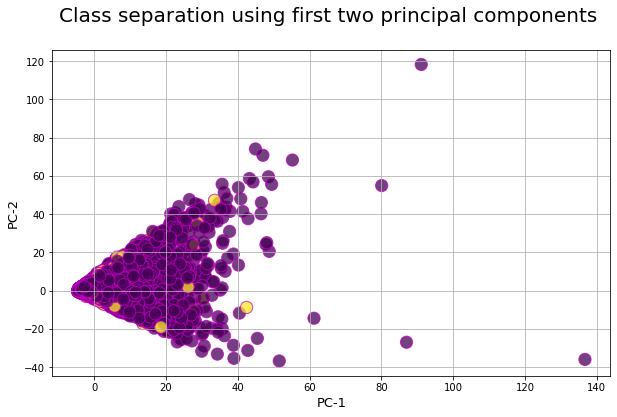

In [44]:
plt.figure(figsize=(10,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y_train, edgecolors="m", alpha=0.75, s=150)
plt.grid(True)
plt.title("Class separation using first two principal components \n", fontsize=20)
plt.xlabel("PC-1",fontsize=13)
plt.ylabel("PC-2",fontsize=13)
plt.show()

## **3.The choice and adjustment of the algorithm.**

In [47]:
#Separation of the dataset into training and test sets with the scikit-learn train_test_split method.
# Régler avec précision votre modèle.
# 7. Présenter votre solution.
# 8. Lancer, surveiller et maintenir votre système.
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(X_scaled,
y_train,
test_size=0.2,
stratify=y_train)

In [102]:
#xgboost
!pip3 install xgboost

In [103]:
#The algorithms we will use are the following: 
# 1.SVM
# 2.Random Forest
# 3.logistic regression
# 4.nearest neighbor algorithm
# 5.decision trees
# 6.naive bayes
# 7.gradientBoostingClassifier
#8.xgboost
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

In [57]:
#SVM
svm_classifier = SVC()
svm_classifier.fit(x_train, y_train)
svm_classifier.score(x_train,y_train)

0.9359274272754871

In [56]:
#Random Forest 
rf_classifier = RandomForestClassifier()
rf_classifier.fit(x_train,y_train)
rf_classifier.score(x_train,y_train)

0.9999642850765192

In [55]:
#Logistic Regression Classifier
lr_classifier = LogisticRegression()
lr_classifier.fit(x_train,y_train)
lr_classifier.score(x_train,y_train)

C:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9321416453865248

In [58]:
#KNN classifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(x_train,y_train)
knn_classifier.score(x_train,y_train)

0.9326059393917748

In [53]:
#Tree Decision
td_classifier = DecisionTreeClassifier()
td_classifier.fit(x_train,y_train)
td_classifier.score(x_train,y_train)

1.0

In [52]:
#GaussianNB
gaussian_classifier = GaussianNB()
gaussian_classifier.fit(x_train,y_train)
gaussian_classifier.score(x_train,y_train)

0.66099394632047

In [51]:
#GradientBoostingClassifier
gb_classifier = GradientBoostingClassifier()
gb_classifier.fit(x_train,y_train)
gb_classifier.score(x_train,y_train)

0.945124020071787

In [107]:
#XGBClassifier
xgclassifier = XGBClassifier(objective='binary:logistic',)
xgclassifier.fit(x_train,y_train)
xgclassifier.score(x_train,y_train)

0.974517402096466

In [ ]:
# clf = Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('classifier', LogisticRegression())])

## **4.Improving evaluation through cross-validation**

In [61]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics


In [69]:
#GradientBoostingClassifier
scores = cross_val_score(gb_classifier, x_val, y_val, cv=5,scoring='accuracy')
print(f"{scores.mean()} accuracy with a standard deviation of {scores.std()}")

0.9407857142857143 accuracy with a standard deviation of 0.004592584973051008


In [70]:
#Tree Decision
scores = cross_val_score(td_classifier, x_val, y_val, cv=5,scoring='accuracy')
print(f"{scores.mean()} accuracy with a standard deviation of {scores.std()}")

0.9077857142857143 accuracy with a standard deviation of 0.004311825220796163


In [72]:
#Logistic Regression Classifier
scores = cross_val_score(lr_classifier, x_val, y_val, cv=5,scoring='accuracy')
print(f"{scores.mean()} accuracy with a standard deviation of {scores.std()}")

C:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

0.9301428571428572 accuracy with a standard deviation of 0.0019245990836153752


C:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [76]:
#Random Forest 
scores = cross_val_score(rf_classifier, x_val, y_val, cv=5,scoring='accuracy')
print(f"{scores.mean()} accuracy with a standard deviation of {scores.std()}")

0.9380714285714286 accuracy with a standard deviation of 0.0028624949870734275


In [75]:
#SVM
scores = cross_val_score(svm_classifier, x_val, y_val, cv=5,scoring='accuracy')
print(f"{scores.mean()} accuracy with a standard deviation of {scores.std()}")

0.9138571428571428 accuracy with a standard deviation of 0.00302540265493535


In [74]:
#KNN classifier
scores = cross_val_score(knn_classifier, x_val, y_val, cv=5,scoring='accuracy')
print(f"{scores.mean()} accuracy with a standard deviation of {scores.std()}")

0.9039285714285714 accuracy with a standard deviation of 0.004315373561998052


In [108]:
#XGBClassifier
scores = cross_val_score(xgclassifier, x_val, y_val, cv=5,scoring='accuracy')
print(f"{scores.mean()} accuracy with a standard deviation of {scores.std()}")

0.9374285714285715 accuracy with a standard deviation of 0.0017699302419091287


##  **5.FINE-TUNE MY BEST MODELS**

    With the performance obtained with the GradientBoostingClassifier algorithm on the training and validation sets, I will use it as the primary classification algorithm in my project.

In [78]:
from sklearn.model_selection import GridSearchCV

In [79]:
p_test3 = {'learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001], 'n_estimators':[100,250,500,750,1000,1250,1500,1750]}

tuning = GridSearchCV(estimator =GradientBoostingClassifier(max_depth=4, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10), 
            param_grid = p_test3, scoring='accuracy',n_jobs=4,iid=False, cv=5)
tuning.fit(x_val,y_val)


C:\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


AttributeError: 'GridSearchCV' object has no attribute 'grid_scores_'

In [80]:
#tuning.grid_scores_, tuning.best_params_, tuning.best_score_
tuning.best_params_

{'learning_rate': 0.01, 'n_estimators': 1500}

In [90]:
final_model=tuning.best_estimator_

In [91]:
tuning.best_score_

0.941857142857143

In [92]:
from sklearn.pipeline import make_pipeline
pipeline_final = make_pipeline(
    preprocessor, final_model
)

In [93]:
#Loading the model
import joblib
joblib.dump(pipeline_final, 'modele_grid_pipe.pkl')

['modele_grid_pipe.pkl']

In [94]:
#Using the saved template
import joblib
grid_search_mon_pipe = joblib.load('modele_grid_pipe.pkl')

In [109]:
#XGBClassifier with GridSearchCV
from sklearn.model_selection import GridSearchCV
PARAMETERS = {"subsample":[0.5, 0.75, 1],
              "colsample_bytree":[0.5, 0.75, 1],
              "max_depth":[2, 6, 12],
              "min_child_weight":[1,5,15],
              "learning_rate":[0.3, 0.1, 0.03],
              "n_estimators":[100]}


#model = xgb.XGBClassifier(n_estimators=100, n_jobs=-1)
model_gs = GridSearchCV(xgclassifier,param_grid=PARAMETERS,cv=5,scoring="accuracy")
model_gs.fit(x_val,y_val)

print(model_gs.best_params_)

{'colsample_bytree': 0.5, 'learning_rate': 0.3, 'max_depth': 2, 'min_child_weight': 15, 'n_estimators': 100, 'subsample': 1}


In [113]:
final_model_xgboostclassifier=model_gs.best_estimator_

In [114]:
final_model_xgboostclassifier

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.3, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=2, max_leaves=0, min_child_weight=15,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [115]:
pipeline_final_xgboostclassifier = make_pipeline(
    preprocessor, final_model_xgboostclassifier
)

In [116]:
pipeline_final_xgboostclassifier

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000207FDA8B0A0>),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('oneh...
  

In [117]:
#Loading the model
import joblib
joblib.dump(pipeline_final_xgboostclassifier, 'modele_grid_pipe_xgboostclassifier.pkl')

['modele_grid_pipe_xgboostclassifier.pkl']

In [118]:
#Using the saved template
import joblib
grid_search_mon_pipe_xgboostclassifier = joblib.load('modele_grid_pipe_xgboostclassifier.pkl')

## **6.Evaluation of the model on the test set**

In [95]:
final_predictions = grid_search_mon_pipe.predict(test_df)

In [96]:
final_predictions

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [99]:
df = pd.DataFrame(data={"id":test_df["id"],"churn_probability":final_predictions})

In [101]:
df.to_csv("submission.csv", index=False)

In [ ]:
#XGBOOSTCLASSIFIER


In [119]:
final_predictions_xgboost = grid_search_mon_pipe_xgboostclassifier.predict(test_df)

In [120]:
final_predictions_xgboost

array([0, 0, 1, ..., 0, 0, 0])

In [121]:
df = pd.DataFrame(data={"id":test_df["id"],"churn_probability":final_predictions_xgboost})

In [122]:
df.to_csv("new_submission.csv", index=False)